# MSP Project: Mode Development

In [1]:
import numpy as np
import pandas as pd

# import libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
mobile_data = pd.read_csv("mobile_sales_v2.csv", index_col=0)
mobile_data.head()

,Brands,Models,Colors,Camera,Mobile,Memory_MB,Storage_GB,Rating,Sale Price,Price,Discount,Discount_perc
0,SAMSUNG,GALAXY M31S,Mirage Black,Yes,SAMSUNG GALAXY M31S,8000.0,128.0,4.3,19330,20999,1669,7.95
1,Nokia,3.2,Steel,Yes,Nokia 3.2,2000.0,16.0,3.8,10199,10199,0,0.00
2,realme,C2,Diamond Black,Yes,realme C2,2000.0,1.0,4.4,6999,7999,1000,12.50
3,Infinix,Note 5,Ice Blue,Yes,Infinix Note 5,4000.0,64.0,4.2,12999,12999,0,0.00
4,Apple,iPhone 11,Black,Yes,Apple iPhone 11,4000.0,64.0,4.6,49900,49900,0,0.00


### Model Development: Approach

+ Feature Engineering
+ Correlation Analysis: on new features
+ Model Development 1: Linear Regression
+ Model Development 2: Neural Networks

Model 2: Neural Network
+ Model Building 2: Neural Network with Linear Regression
+ Model Training
+ Model Evaluation
+ Model Summary

## Feature Engineering

Features that will be build: 
+ Price Difference
+ Discount Impact
+ Price per GB
+ Price per MB
+ Brand Popularity

### Feature Generation

In [3]:
mobile_data.head()

,Brands,Models,Colors,Camera,Mobile,Memory_MB,Storage_GB,Rating,Sale Price,Price,Discount,Discount_perc
0,SAMSUNG,GALAXY M31S,Mirage Black,Yes,SAMSUNG GALAXY M31S,8000.0,128.0,4.3,19330,20999,1669,7.95
1,Nokia,3.2,Steel,Yes,Nokia 3.2,2000.0,16.0,3.8,10199,10199,0,0.00
2,realme,C2,Diamond Black,Yes,realme C2,2000.0,1.0,4.4,6999,7999,1000,12.50
3,Infinix,Note 5,Ice Blue,Yes,Infinix Note 5,4000.0,64.0,4.2,12999,12999,0,0.00
4,Apple,iPhone 11,Black,Yes,Apple iPhone 11,4000.0,64.0,4.6,49900,49900,0,0.00


In [4]:
# feature 1: price difference
mobile_data["Price_Difference"] = mobile_data["Price"] - mobile_data["Sale Price"]

# feature 2: Discount Impact
mobile_data["Discount_Impact"] = mobile_data["Discount"]/mobile_data["Price"]

# feature 3: Price per GB and MB
mobile_data["Price_p_GB"] = mobile_data["Sale Price"]/mobile_data["Storage_GB"]
mobile_data["Price_p_MB"] = mobile_data["Sale Price"]

In [5]:
# feature 4: Brand Popularity
brand_sales_avg = mobile_data.groupby('Brands')["Sale Price"].mean()
mobile_data["Brand_Popularity"] = mobile_data["Brands"].map(brand_sales_avg)

In [6]:
mobile_data.head()

,Brands,Models,Colors,Camera,Mobile,Memory_MB,Storage_GB,Rating,Sale Price,Price,Discount,Discount_perc,Price_Difference,Discount_Impact,Price_p_GB,Price_p_MB,Brand_Popularity
0,SAMSUNG,GALAXY M31S,Mirage Black,Yes,SAMSUNG GALAXY M31S,8000.0,128.0,4.3,19330,20999,1669,7.95,1669,0.079480,151.015625,19330,24296.248957
1,Nokia,3.2,Steel,Yes,Nokia 3.2,2000.0,16.0,3.8,10199,10199,0,0.00,0,0.000000,637.437500,10199,9428.657277
2,realme,C2,Diamond Black,Yes,realme C2,2000.0,1.0,4.4,6999,7999,1000,12.50,1000,0.125016,6999.000000,6999,16396.535168
3,Infinix,Note 5,Ice Blue,Yes,Infinix Note 5,4000.0,64.0,4.2,12999,12999,0,0.00,0,0.000000,203.109375,12999,11092.178808
4,Apple,iPhone 11,Black,Yes,Apple iPhone 11,4000.0,64.0,4.6,49900,49900,0,0.00,0,0.000000,779.687500,49900,81985.560724


In [7]:
# save mobile data as version 3
mobile_data.to_csv("mobile_sales_v3.csv")

### Feature Encoding

Features for encoding: Mobile, Brands, Colors and Models
New encoded features: 
+ Mobile_count
+ Brands_count
+ Models_count
+ Colors_count

In [8]:
mobile_cat_data = mobile_data.select_dtypes("object")
mobile_cat_data.head()
mobile_cat_data.describe()

,Brands,Models,Colors,Camera,Mobile
count,3114,3114,3114,3114,3114
unique,17,914,639,1,928
top,SAMSUNG,iPhone 11,Black,Yes,Apple iPhone 11
freq,719,36,489,3114,36


In [9]:
# remove camera feature
mobile_data = mobile_data.drop(columns=["Camera"], axis=1)

In [10]:
# count the number of distinct values in categorical data
count_feature = lambda x: mobile_data[x].value_counts()

# count the features: Mobile, Models and Colors
mobile_data["Mobile_count"] = mobile_data["Mobile"].map(count_feature("Mobile"))
mobile_data["Brands_count"] = mobile_data["Brands"].map(count_feature("Brands"))
mobile_data["Models_count"] = mobile_data["Models"].map(count_feature("Models"))
mobile_data["Colors_count"] = mobile_data["Colors"].map(count_feature("Colors"))

In [11]:
mobile_data.head()

,Brands,Models,Colors,Mobile,Memory_MB,Storage_GB,Rating,Sale Price,Price,Discount,Discount_perc,Price_Difference,Discount_Impact,Price_p_GB,Price_p_MB,Brand_Popularity,Mobile_count,Brands_count,Models_count,Colors_count
0,SAMSUNG,GALAXY M31S,Mirage Black,SAMSUNG GALAXY M31S,8000.0,128.0,4.3,19330,20999,1669,7.95,1669,0.079480,151.015625,19330,24296.248957,1,719,1,2
1,Nokia,3.2,Steel,Nokia 3.2,2000.0,16.0,3.8,10199,10199,0,0.00,0,0.000000,637.437500,10199,9428.657277,5,213,5,6
2,realme,C2,Diamond Black,realme C2,2000.0,1.0,4.4,6999,7999,1000,12.50,1000,0.125016,6999.000000,6999,16396.535168,7,327,7,15
3,Infinix,Note 5,Ice Blue,Infinix Note 5,4000.0,64.0,4.2,12999,12999,0,0.00,0,0.000000,203.109375,12999,11092.178808,5,151,5,3
4,Apple,iPhone 11,Black,Apple iPhone 11,4000.0,64.0,4.6,49900,49900,0,0.00,0,0.000000,779.687500,49900,81985.560724,36,387,36,489


### Correlation Analysis

In [12]:
# create correlation analysis
def correlation_analysis():
  # create correlations among features
  mobile_num = mobile_data.select_dtypes(["float", "int"]).columns
  mobile_feat_corr = mobile_data[mobile_num].corr()

  # create heatmap --> show feature correlations
  plt.figure(figsize=(14,10))
  sns.heatmap(mobile_feat_corr, annot=True,  cmap=['black','grey', "silver", 'white'])
  plt.xticks(rotation=30)
  plt.title("Correlation Map")

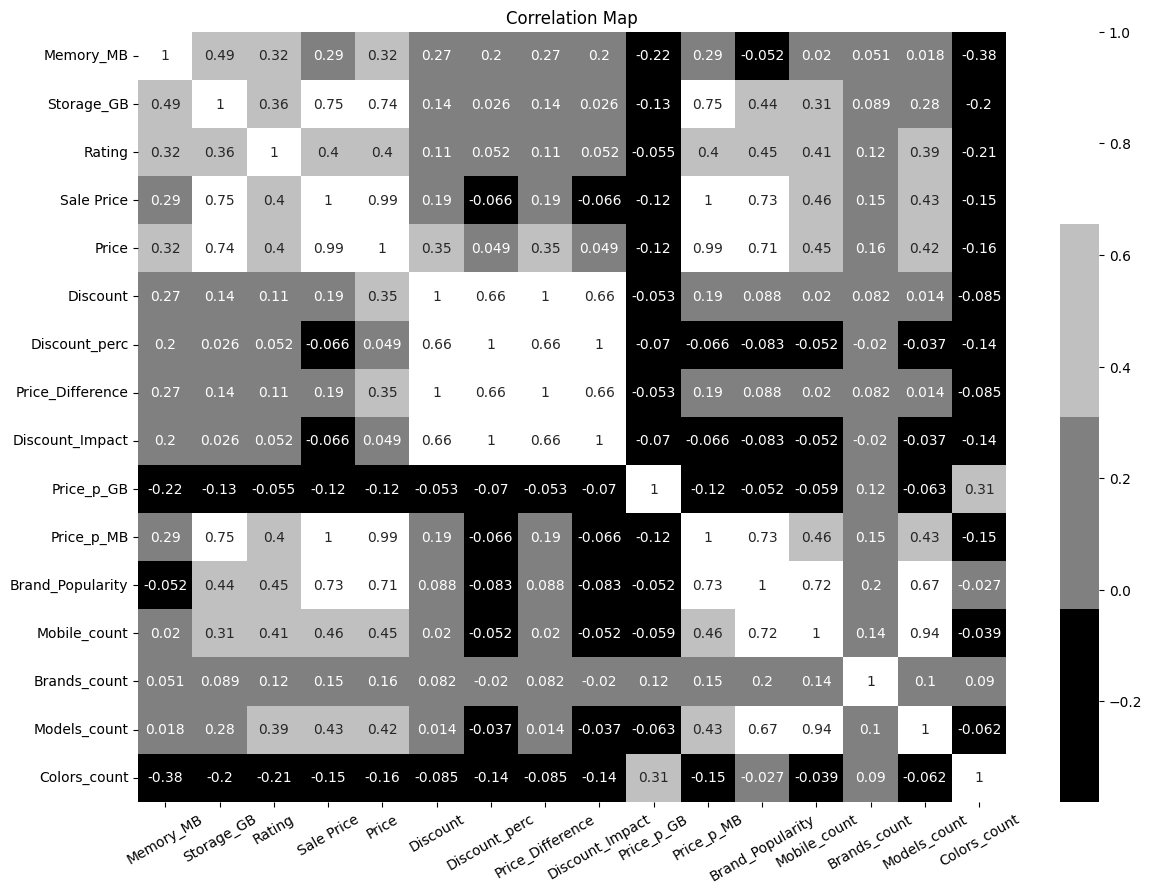

In [16]:
correlation_analysis()

### Handling Multicollinearity

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
mobile_numX = mobile_data.select_dtypes(["float", "int"])
mobile_numX.head()

,Memory_MB,Storage_GB,Rating,Sale Price,Price,Discount,Discount_perc,Price_Difference,Discount_Impact,Price_p_GB,Price_p_MB,Brand_Popularity,Mobile_count,Brands_count,Models_count,Colors_count
0,8000.0,128.0,4.3,19330,20999,1669,7.95,1669,0.079480,151.015625,19330,24296.248957,1,719,1,2
1,2000.0,16.0,3.8,10199,10199,0,0.00,0,0.000000,637.437500,10199,9428.657277,5,213,5,6
2,2000.0,1.0,4.4,6999,7999,1000,12.50,1000,0.125016,6999.000000,6999,16396.535168,7,327,7,15
3,4000.0,64.0,4.2,12999,12999,0,0.00,0,0.000000,203.109375,12999,11092.178808,5,151,5,3
4,4000.0,64.0,4.6,49900,49900,0,0.00,0,0.000000,779.687500,49900,81985.560724,36,387,36,489


### Feature Selection

In [19]:
# correlation on sale price
mobile_num = mobile_data.select_dtypes(["float", "int"]).columns
mobile_feat_corr = mobile_data[mobile_num].corr()
mobile_sales_corr = mobile_feat_corr["Sale Price"].to_frame().reset_index()
mobile_sales_corr = mobile_sales_corr.rename(columns={"index": "X Features", "Sale Price": "CorrelationIndex"})

In [20]:
# separate correlation df into sets with positive and negative correlation index
mobile_poscorr = mobile_sales_corr[mobile_sales_corr["CorrelationIndex"] > 0.1]
mobile_negcorr = mobile_sales_corr[mobile_sales_corr["CorrelationIndex"] < -0.1]

In [21]:
print(f"{mobile_poscorr} \n ")
print(mobile_negcorr)

          X Features  CorrelationIndex
0          Memory_MB          0.286706
1         Storage_GB          0.753670
2             Rating          0.403680
3         Sale Price          1.000000
4              Price          0.986097
5           Discount          0.191189
7   Price_Difference          0.191189
10        Price_p_MB          1.000000
11  Brand_Popularity          0.731499
12      Mobile_count          0.463920
13      Brands_count          0.149307
14      Models_count          0.432885 
 
      X Features  CorrelationIndex
9     Price_p_GB         -0.115429
15  Colors_count         -0.151808


In [22]:
print(f"Strong Correlated Features: {mobile_poscorr["X Features"].values}")
print(f"Strong Negative Features: {mobile_negcorr["X Features"].values}")

Strong Correlated Features: ['Memory_MB' 'Storage_GB' 'Rating' 'Sale Price' 'Price' 'Discount'
 'Price_Difference' 'Price_p_MB' 'Brand_Popularity' 'Mobile_count'
 'Brands_count' 'Models_count']
Strong Negative Features: ['Price_p_GB' 'Colors_count']


In [23]:
# select features with strongest positive correlation
mobile_numX = mobile_numX[['Memory_MB','Storage_GB', 'Rating', 'Sale Price', 'Price', 'Discount',
 'Price_Difference', 'Price_p_MB', 'Brand_Popularity', 'Mobile_count',
 'Brands_count', 'Models_count']]

## Model Development 1: Linear Regression Model

In [86]:
# import libraries for regression model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

Model 1: Linear Regression
+ Model Building 1: Linear Regression Model 
+ Model Training
+ Model Evaluation

In [25]:
mobile_numX.head()

,Memory_MB,Storage_GB,Rating,Sale Price,Price,Discount,Price_Difference,Price_p_MB,Brand_Popularity,Mobile_count,Brands_count,Models_count
0,8000.0,128.0,4.3,19330,20999,1669,1669,19330,24296.248957,1,719,1
1,2000.0,16.0,3.8,10199,10199,0,0,10199,9428.657277,5,213,5
2,2000.0,1.0,4.4,6999,7999,1000,1000,6999,16396.535168,7,327,7
3,4000.0,64.0,4.2,12999,12999,0,0,12999,11092.178808,5,151,5
4,4000.0,64.0,4.6,49900,49900,0,0,49900,81985.560724,36,387,36


+ Independent Variable: all numeric specification of mobile
+ Dependent Variable: Sale Price

In [26]:
# split test and training set
mobileX = mobile_numX.drop(columns=["Sale Price", "Price"])
mobileY = mobile_numX["Sale Price"]

xtrain, xtest, ytrain, ytest = train_test_split(mobileX, mobileY, test_size=0.25, random_state=1234)

In [27]:
print(f"Training: X={xtrain.shape}, Y={ytrain.shape}")
print(f"Testing: X={xtest.shape}, Y={ytest.shape}")

Training: X=(2335, 10), Y=(2335,)
Testing: X=(779, 10), Y=(779,)


In [55]:
# normalize data
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [56]:
# build linear regression model
model1 = LinearRegression()
model1.fit(xtrain, ytrain)

LinearRegression()

### Model Evaluation

+ Make Predictions
+ calculate mean squared error
+ calculate r2-score

In [77]:
# make predictions
mob_price_pred = model1.predict(xtest)
ypred = mob_price_pred[:len(ytest)]
ypred.shape

(779,)

In [66]:
# creating model evaluating set
mod_eval = pd.DataFrame()

mod_eval["Features"] = mobileX.columns
mod_eval["Coefficients"] = model1.coef_
mod_eval["Intercepts"] = model1.intercept_

In [70]:
mod_eval.set_index("Features")

,Coefficients,Intercepts
Features,,
Memory_MB,2.829620e-12,26736.018415
Storage_GB,9.094947e-12,26736.018415
Rating,6.821210e-12,26736.018415
Discount,-4.993034e+02,26736.018415
Price_Difference,4.993034e+02,26736.018415
Price_p_MB,3.052618e+04,26736.018415
Brand_Popularity,6.707523e-12,26736.018415
Mobile_count,1.705303e-13,26736.018415
Brands_count,3.467449e-12,26736.018415


In [106]:
# evaluate metrics
metrics = pd.DataFrame()

def evaluate_metrics(ytest, ypred): 
  # cacluate metrics for regression model
  mae = mean_absolute_error(ytest, ypred)
  rmse = root_mean_squared_error(ytest, ypred)
  r2score = r2_score(ytest, ypred)
  
  # convert metrics into pandas series
  metrics = [mae, rmse, r2score]
  metric_labels = ["Mean_Absolute_Error(MAE)", "Mean_Squared_Error(MSE)", "R2Score"]
  metric_set = pd.DataFrame()

  for measure, label in zip(metrics, metric_labels):
    metric_series = pd.Series(measure)
    metric_set[label] = metric_series

  metric_set = metric_set.transpose().reset_index()
  metric_set = metric_set.rename(columns={"index": "Metric_Parameters", 0: "Measure"})

  return metric_set

In [107]:
metric_data = evaluate_metrics(ytest, ypred)
metric_data

,Metric_Parameters,Measure
0,Mean_Absolute_Error(MAE),1243.000918
1,Mean_Squared_Error(MSE),2261.675912
2,R2Score,0.993750


### Visualise Model Performance

<Axes: xlabel='Metric_Parameters'>

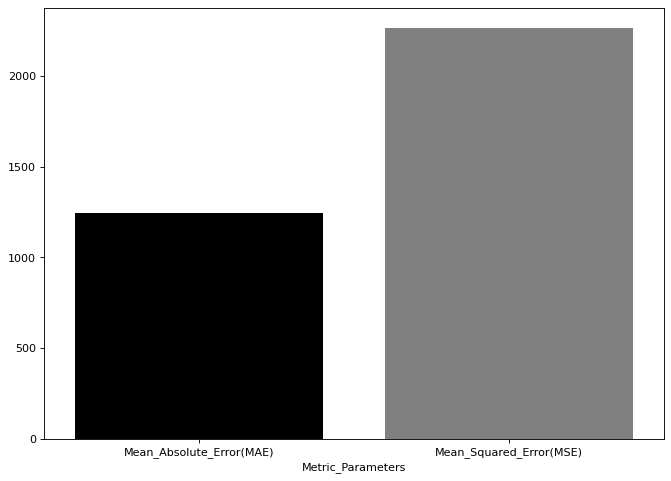

In [125]:
metrics = metric_data.groupby("Metric_Parameters")[["Measure"]].mean()
metrics = metrics.transpose()

plt.figure(figsize=(10, 7), dpi=80)
sns.barplot(data=metrics.drop(columns=["R2Score"]), palette=["black", "gray"])

Correlation with Sale Price: 
+ Price_p_MB
+ Storage_GB
+ Brand_Popularity

In [127]:
mobile_poscorr.sort_values(by=["CorrelationIndex"], ascending=False)

,X Features,CorrelationIndex
3,Sale Price,1.000000
10,Price_p_MB,1.000000
4,Price,0.986097
1,Storage_GB,0.753670
11,Brand_Popularity,0.731499
12,Mobile_count,0.463920
14,Models_count,0.432885
2,Rating,0.403680
0,Memory_MB,0.286706
5,Discount,0.191189


In [128]:
mobile_numX

,Memory_MB,Storage_GB,Rating,Sale Price,Price,Discount,Price_Difference,Price_p_MB,Brand_Popularity,Mobile_count,Brands_count,Models_count
0,8000.0,128.0,4.300000,19330,20999,1669,1669,19330,24296.248957,1,719,1
1,2000.0,16.0,3.800000,10199,10199,0,0,10199,9428.657277,5,213,5
2,2000.0,1.0,4.400000,6999,7999,1000,1000,6999,16396.535168,7,327,7
3,4000.0,64.0,4.200000,12999,12999,0,0,12999,11092.178808,5,151,5
4,4000.0,64.0,4.600000,49900,49900,0,0,49900,81985.560724,36,387,36
...,...,...,...,...,...,...,...,...,...,...,...,...
3109,6000.0,128.0,4.400000,16999,19999,3000,3000,16999,16870.621622,9,74,9
3110,0.0,32.0,3.600000,3499,3499,0,0,3499,9428.657277,3,213,3
3111,2000.0,128.0,4.500000,44900,44900,0,0,44900,81985.560724,17,387,17
3112,6000.0,128.0,4.243098,119900,119900,0,0,119900,81985.560724,12,387,12


In [ ]:
pricemb_graph = 

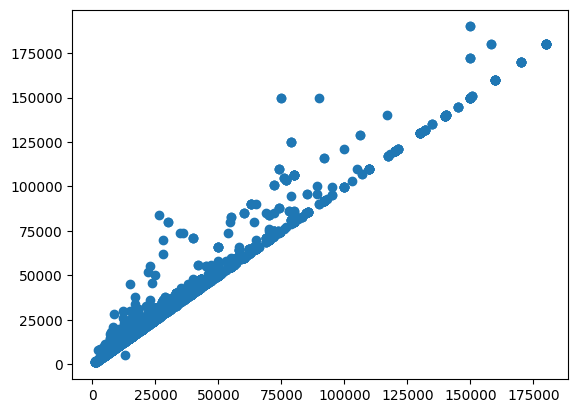

In [129]:
# correaltion 1: Price_p_MB vs Sale Price
plt.scatter(mobile_numX["Price_p_MB"], mobile_numX["Price"])
plt.plot()

In [130]:
# split test and training set
mobileX = mobile_numX.drop(columns=["Sale Price", "Price"])
mobileY = mobile_numX["Sale Price"]

xtrain, xtest, ytrain, ytest = train_test_split(mobileX, mobileY, test_size=0.25, random_state=1234)

In [ ]:
# normalize data
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [180]:
# training loop: computing mse for model performance
mse_list = []
mae_list = []
epochs = []
for i, xfeature in enumerate(mobileX.columns):
  mobileX_var = mobileX[[xfeature]]
  mobileY_var = mobile_numX["Sale Price"]
  xtrain, xtest, ytrain, ytest = train_test_split(mobileX_var, mobileY_var, test_size=0.25, random_state=1234)

  # build linear regression model
  model = LinearRegression()
  model.fit(xtrain, ytrain)

  # make predictions
  ypred = model.predict(xtest)
  model_coef, model_ic = model.coef_, model.intercept_
  
  # evaluate model
  mse = root_mean_squared_error(ytest, ypred)
  mae = mean_absolute_error(ytest, ypred)
  mse_list.append(mse)
  mae_list.append(mae)

In [181]:
# convert metric lists to arrays
mse_array = np.array(mse_list)
mae_array = np.array(mae_list)

# create metric dataset if and only there are 10 features 
if mse_array.shape[0] == 10: 
  perform_metric = pd.DataFrame()
  perform_metric["Features"] = mobileX.columns
  perform_metric["MSE"] = mse_array
  perform_metric["MAE"] = mae_array
else: 
  print(f"Shape of MSE-array is {mse_array.shape[0]}")

In [182]:
perform_metric

,Features,MSE,MAE
0,Memory_MB,2.754233e+04,1.833401e+04
1,Storage_GB,1.871424e+04,1.262801e+04
2,Rating,2.600312e+04,1.764647e+04
3,Discount,2.810300e+04,1.865679e+04
4,Price_Difference,2.810300e+04,1.865679e+04
5,Price_p_MB,1.323184e-11,8.105477e-12
6,Brand_Popularity,1.951478e+04,1.206310e+04
7,Mobile_count,2.563227e+04,1.670571e+04
8,Brands_count,2.820095e+04,1.882729e+04
9,Models_count,2.591635e+04,1.675488e+04


ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

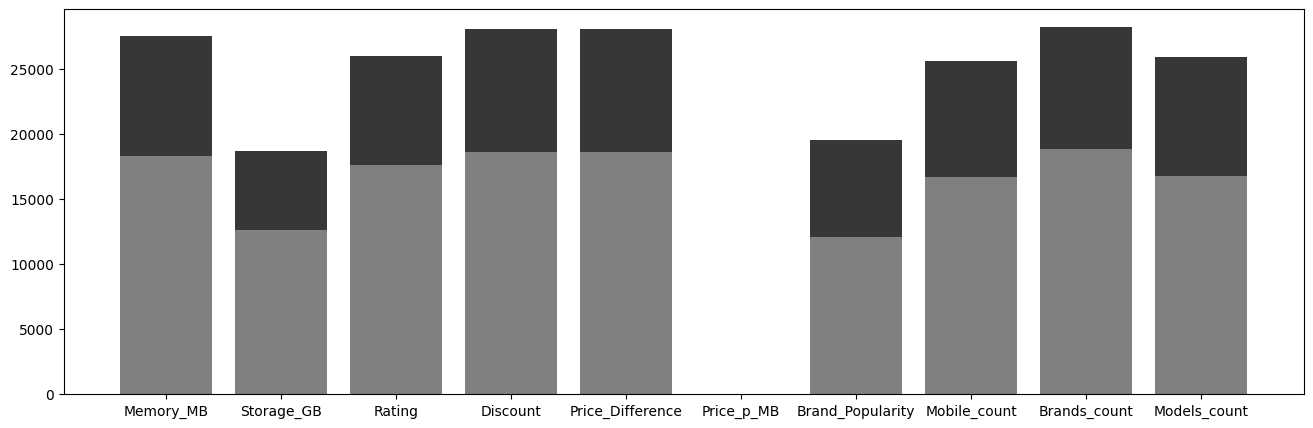

In [188]:
# visualise mse per feature 
features = perform_metric["Features"]
mse_feat = perform_metric["MSE"]
plt.figure(figsize=(16, 5))

colors = ["black", "gray"]
plt.bar(features, mse_feat, color="black", alpha=0.785, label="Mean Squared Error(MSE)")
plt.bar(features, mae_array, color="gray", label="Mean Absoluate Error(MAE)")
plt.xlabel("Mobile Features")
plt.ylabel("Error Distance Metric")

plt.legend()